# Marker Determination

In [2]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import joblib

sc.settings.n_jobs = -1

os.chdir("/project/hipaa_ycheng11lab/atlas/CAMR2024/")
os.makedirs('03_Filter_Model_Markers', exist_ok = True)

number_of_features = 20

sc.plotting.DotPlot.DEFAULT_SAVE_PREFIX = "" # "03_Filter_Model_Markers/figures/3_dotplot_"
sc.plotting.DotPlot.DEFAULT_LARGEST_DOT = 200.0

In [3]:
adata = ad.read_h5ad('02_Modeling/2_camr_modeling_input.h5ad')
gene_names = adata.var["feature_name"].astype(str)
highly_variable = adata.raw.var['feature_name'].isin(gene_names.tolist())
adata

AnnData object with n_obs × n_vars = 294561 × 2175
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', '

## Major Class Markers

In [4]:
analysis_name = 'majorclass'
major_markers_remaining = {"total_genes": len(highly_variable), "variable_genes": len(gene_names)}
major_markers_remaining

{'total_genes': 32034, 'variable_genes': 2175}

In [5]:
top_features_log_reg = pd.read_csv(f'02_Modeling/{analysis_name}/2_ovr_LogReg_{analysis_name}_AbsTop{number_of_features}Markers.txt', sep = '\t')
# Only positive features, negative markers are less useful
top_features_log_reg_pos = top_features_log_reg[top_features_log_reg['Coefficient'] > 0]
top_features_log_reg_pos.index = top_features_log_reg_pos.Marker
major_markers_remaining["queried_genes"] = len(top_features_log_reg_pos.Marker) # 240
top_features_log_reg_pos

,Name,Major_Name,Marker,Ensembl,Coefficient
Marker,,,,,
Synpr,AC,AC,Synpr,Synpr,0.593647
Asic2,AC,AC,Asic2,Asic2,0.561311
Frmd5,AC,AC,Frmd5,Frmd5,0.557747
Slc32a1,AC,AC,Slc32a1,Slc32a1,0.551331
Gad1,AC,AC,Gad1,Gad1,0.517364
...,...,...,...,...,...
Epb41,Rod,Rod,Epb41,Epb41,0.272485
Pde6a,Rod,Rod,Pde6a,Pde6a,0.272482
Dmd,Rod,Rod,Dmd,Dmd,0.270124


In [6]:
top_features_log_reg_pos = top_features_log_reg_pos.loc[top_features_log_reg_pos["Marker"].value_counts()==1]
major_markers_remaining['unique_queried_genes'] = len(top_features_log_reg_pos['Marker'])
print(major_markers_remaining, top_features_log_reg_pos["Marker"].tolist()) # 217

{'total_genes': 32034, 'variable_genes': 2175, 'queried_genes': 240, 'unique_queried_genes': 217} ['Synpr', 'Asic2', 'Frmd5', 'Slc32a1', 'Gad1', 'Gria4', 'Tfap2b', 'Grik2', 'Grm8', 'Anks1b', 'Slc6a9', 'Slc6a1', 'Ptprk', 'Nckap5', 'Lhfp', 'Prkg1', 'Cxcl14', 'Dlgap1', 'Hspa1a', 'Eftud2', 'Creb5', 'Fos', 'Fosb', 'Vcl', 'Gfap', 'S100b', 'Atf3', 'Mt2', 'Ccn1', 'Wwtr1', 'Egr1', 'Dnajb1', 'Aldoc', 'Junb', 'Zswim6', 'Csrp1', 'Ppp1r15a', 'Mlc1', 'Zfp804b', 'Pcdh9', 'Samsn1', 'Gabra1', 'Trpm1', 'Slit2', 'Grm6', 'Gm20754', 'Grik1', 'Gabrr2', 'Glra1', 'Cdh11', 'Grm5', 'Scg2', 'Ttyh1', 'Tenm3', 'B3galt2', 'Csmd3', 'Ptprz1', 'Arr3', 'Pde6h', 'Opn1mw', 'Cngb3', 'Cdh18', 'Gngt2', 'Pde6c', 'Gnat2', 'Opn1sw', 'Pcdh15', 'Gnb3', 'Slc24a2', 'Rbp3', 'Guca1a', 'Lrfn2', 'Gm32442', 'Kcne2', 'Pals2', 'Rtbdn', 'Cldn5', 'Flt1', 'Ly6c1', 'Itm2a', 'Pltp', 'Adgrl4', 'Ly6a', 'Plcb1', 'Ptprb', 'Ptprm', 'Klf2', 'Mecom', 'Slco1a4', 'Ctla2a', 'Arl15', 'Ifitm3', 'Id1', 'Tm4sf1', 'Calb1', 'Vim', 'Thsd7b', 'Nebl', 'Ndrg1', 

In [7]:
# Filter based on innate features of the gene itself
in_regression = adata.var["feature_name"].astype(str).isin(top_features_log_reg_pos["Marker"])
long_enough = adata.var["feature_length"].astype(int) >= 960 # It's a conservative filter

is_genomic_candidate = long_enough & in_regression
genomic_candidates = gene_names[is_genomic_candidate.tolist()].tolist()
major_markers_remaining["genomic_candidates"] = len(genomic_candidates)
print(major_markers_remaining["genomic_candidates"], genomic_candidates) # 205 genes

205 ['6330411D24Rik', 'Abca8a', 'Abhd2', 'Acsl3', 'Adgrl4', 'Aldoc', 'Anks1b', 'Apoe', 'Aqp4', 'Arhgap15', 'Arhgap42', 'Arl15', 'Arr3', 'Asic2', 'Atf3', 'Atp1a2', 'B3galt2', 'C1qa', 'C1qb', 'C1qc', 'Calb1', 'Calb2', 'Cald1', 'Cartpt', 'Ccn1', 'Ccn2', 'Cd52', 'Cd53', 'Cdh11', 'Cdh18', 'Cdr2', 'Chgb', 'Cldn5', 'Clstn2', 'Clu', 'Cmss1', 'Cnga1', 'Cngb3', 'Col8a1', 'Col9a1', 'Coro1a', 'Creb5', 'Crip1', 'Csmd3', 'Csrp1', 'Ctla2a', 'Ctsd', 'Ctss', 'Ctsz', 'Cxcl14', 'D130079A08Rik', 'Dbi', 'Dkk3', 'Dlc1', 'Dlgap1', 'Dmd', 'Dnajb1', 'Dock4', 'Eftud2', 'Egfem1', 'Egr1', 'Epb41', 'Epha6', 'Flt1', 'Fos', 'Fosb', 'Frmd5', 'Frmpd4', 'Gabra1', 'Gabrr2', 'Gad1', 'Galnt18', 'Galntl6', 'Gfap', 'Glra1', 'Glul', 'Gm20754', 'Gm32442', 'Gnat2', 'Gnb3', 'Gng5', 'Gngt1', 'Gngt2', 'Gpr37', 'Gria4', 'Grik1', 'Grik2', 'Grm5', 'Grm6', 'Grm8', 'Gsta4', 'Hexb', 'Hmgn1', 'Hs6st3', 'Hspa1a', 'Id1', 'Il1rapl1', 'Il33', 'Itm2a', 'Junb', 'Kcnd2', 'Kcne2', 'Kctd16', 'Klf2', 'Laptm5', 'Lhfp', 'Lhx2', 'Lrfn2', 'Ly6a', 'Ly

In [8]:
raw_mean_expression = pd.read_csv(f'data/raw_meanExpression_{analysis_name}.txt', sep = '\t', index_col=0)
raw_mean_expression

,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,Sanbr,0610010K14Rik,0610012D04Rik,Ncbp2as2,0610025J13Rik,...,mt-Co2,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd4l,mt-Nd5,mt-Nd6
majorclass,,,,,,,,,,,,,,,,,,,,,
AC,0.006993,0.000049,0.291926,0.017162,0.039839,0.270603,0.381996,0.000000,0.717233,0.000295,...,9.459853,15.013444,10.934282,15.298697,3.700662,1.375102,5.648413,0.575333,0.807106,0.060793
Astrocyte,0.001488,0.000000,0.412202,0.034226,0.243304,0.135417,0.454613,0.000000,0.853423,0.008929,...,58.984375,102.699400,62.043900,87.405500,32.839287,8.126488,42.790924,2.953869,6.974702,0.110863
BC,0.003095,0.003138,0.235552,0.013262,0.037099,0.351814,0.268973,0.000015,0.425838,0.000044,...,43.630590,69.838420,43.496586,16.589417,13.194803,6.381914,21.638742,1.605759,4.622976,0.304591
Cone,0.011720,0.000000,0.360537,0.078415,0.029619,0.293842,0.290859,0.000000,0.639463,0.000000,...,71.326866,102.869804,80.775410,16.475601,21.332197,8.276156,36.110165,3.352014,8.033454,0.543575
Endothelial,0.006932,0.000000,0.170711,0.041594,0.040728,0.198440,0.590121,0.000000,0.473137,0.001733,...,23.109186,29.780762,18.634315,10.772964,8.679376,2.268631,10.818025,0.961872,1.775563,0.228769
HC,0.031746,0.000000,0.404762,0.047619,0.103175,0.380952,0.341270,0.000000,1.801587,0.000000,...,51.047620,74.992065,55.785713,28.095238,15.436508,4.484127,19.619047,3.182540,3.420635,0.365079
MG,0.010413,0.000000,0.490423,0.035352,0.110811,0.136136,0.411235,0.000129,0.884047,0.003471,...,50.012596,64.014140,60.799847,24.976475,39.368427,10.269057,34.550842,4.144235,6.712431,0.272143
Microglia,0.002137,0.000000,0.112590,0.005260,0.046022,0.073143,0.370973,0.000329,0.300131,0.000822,...,8.469428,13.724030,8.869987,8.318048,3.417324,0.854372,5.314760,0.374425,0.812459,0.071006
Pericyte,0.002481,0.000000,0.104218,0.042184,0.084367,0.119107,0.129032,0.000000,0.173697,0.002481,...,15.389578,23.615385,16.771711,7.724566,6.263027,1.843673,9.250620,0.665012,1.374690,0.129032


In [9]:
# Filter based on the filtering criteria
# adata.obs.library_platform.unique() shows that this is mix of 4 chemistries, so use strictest?

# count_limit = 0.1 # Absolute detection limit
count_lowcluster = 4
count_highcluster = 100

detectable_genes = (raw_mean_expression >= count_lowcluster).sum(axis=0) >= 1
optical_crowding_genes = (raw_mean_expression > count_highcluster).sum(axis=0) > 0

is_expression_candidate = detectable_genes & (~optical_crowding_genes)

expression_candidates = gene_names[is_expression_candidate.loc[highly_variable.tolist()].tolist()].tolist()
major_markers_remaining["expression_candidates"] = len(expression_candidates)
print(major_markers_remaining["expression_candidates"], expression_candidates) # 428 genes

428 ['4930447C04Rik', 'Abca8a', 'Abcb1a', 'Abcc9', 'Abcg2', 'Acsl3', 'Actb', 'Adamtsl1', 'Adarb2', 'Adgrl4', 'Aipl1', 'Aldoc', 'Anks1b', 'Aqp4', 'Arhgap15', 'Arhgap31', 'Arl15', 'Arr3', 'Asic2', 'Atf3', 'Atp10a', 'Atp1a2', 'Atp1b1', 'Atp2b1', 'Atrnl1', 'B2m', 'Basp1', 'Bsg', 'Btg2', 'C130073E24Rik', 'C1qa', 'C1qb', 'C1qc', 'C1ql1', 'Cabp5', 'Cacna2d1', 'Cacna2d3', 'Cacnb2', 'Calb1', 'Calb2', 'Cald1', 'Car14', 'Car2', 'Cartpt', 'Ccdc141', 'Ccl12', 'Ccl3', 'Ccl4', 'Ccn1', 'Cd63', 'Cd74', 'Cd81', 'Cd9', 'Cdh18', 'Cdk14', 'Cdkn1a', 'Cebpd', 'Cfh', 'Chgb', 'Cldn10', 'Cldn5', 'Clic4', 'Clu', 'Cmss1', 'Cngb3', 'Cnn3', 'Cntn4', 'Cntn5', 'Cntnap2', 'Col23a1', 'Col8a1', 'Col9a1', 'Cox4i2', 'Cox8b', 'Cp', 'Crb1', 'Creb5', 'Crim1', 'Crip1', 'Crip2', 'Cryab', 'Crym', 'Csf1r', 'Csrp1', 'Ctla2a', 'Ctsd', 'Ctss', 'Ctsz', 'Cx3cr1', 'Cxcl12', 'Cyba', 'Dach1', 'Dapl1', 'Dbi', 'Dct', 'Dgkb', 'Dkk3', 'Dlc1', 'Dlgap1', 'Dmd', 'Dnajb1', 'Dock4', 'Dscam', 'Dscaml1', 'Dusp1', 'Ebf1', 'Eftud2', 'Egfem1', 'Egr1'

In [10]:
# Combine gene metadata filtering and gene expression filtering together
final_candidates = np.intersect1d(expression_candidates, genomic_candidates)
major_markers_remaining["expression_genomic_queried_genes"] = len(final_candidates)
print(major_markers_remaining["expression_genomic_queried_genes"], final_candidates) # 162 genes

162 ['Abca8a' 'Acsl3' 'Adgrl4' 'Aldoc' 'Anks1b' 'Aqp4' 'Arhgap15' 'Arl15'
 'Arr3' 'Asic2' 'Atf3' 'Atp1a2' 'C1qa' 'C1qb' 'C1qc' 'Calb1' 'Calb2'
 'Cald1' 'Cartpt' 'Ccn1' 'Cdh18' 'Chgb' 'Cldn5' 'Clu' 'Cmss1' 'Cngb3'
 'Col8a1' 'Col9a1' 'Creb5' 'Crip1' 'Csrp1' 'Ctla2a' 'Ctsd' 'Ctss' 'Ctsz'
 'Dbi' 'Dkk3' 'Dlc1' 'Dlgap1' 'Dmd' 'Dnajb1' 'Dock4' 'Eftud2' 'Egfem1'
 'Egr1' 'Epb41' 'Flt1' 'Fos' 'Fosb' 'Frmd5' 'Frmpd4' 'Galnt18' 'Galntl6'
 'Gfap' 'Glul' 'Gm20754' 'Gm32442' 'Gnat2' 'Gnb3' 'Gng5' 'Gngt1' 'Gngt2'
 'Gpr37' 'Gria4' 'Grik1' 'Grm5' 'Hexb' 'Hmgn1' 'Hs6st3' 'Hspa1a' 'Id1'
 'Il1rapl1' 'Il33' 'Itm2a' 'Junb' 'Kcnd2' 'Kctd16' 'Klf2' 'Laptm5' 'Lrfn2'
 'Ly6a' 'Ly6c1' 'Ly86' 'Marchf1' 'Mecom' 'Megf11' 'Mgp' 'Mlc1' 'Mt3'
 'Myl9' 'Nckap5' 'Ndrg1' 'Ndufa4l2' 'Nebl' 'Nefl' 'Nrn1' 'Opn1mw' 'Opn1sw'
 'Pals2' 'Pcdh15' 'Pcdh9' 'Pde3a' 'Pde6c' 'Pde6g' 'Pde6h' 'Pdgfrb' 'Plcb1'
 'Plcl1' 'Pltp' 'Ppp1r15a' 'Prdx6' 'Prkg1' 'Ptprb' 'Ptprk' 'Ptprm'
 'Ptprz1' 'Rbfox1' 'Rbp1' 'Rbp3' 'Rbpms' 'Rdh5' 'Rgr' 'Rgs3' 'Rgs

In [11]:
# Save all genes that passed these thresholds
ordered_features = top_features_log_reg_pos.loc[final_candidates.tolist()].sort_values(['Major_Name', 'Name'])
ordered_features.to_csv(f'03_Filter_Model_Markers/3_ovr_LogReg_{analysis_name}_xeniumFiltered.txt', sep ='\t', index=False)
ordered_features

,Name,Major_Name,Marker,Ensembl,Coefficient
Marker,,,,,
Anks1b,AC,AC,Anks1b,Anks1b,0.450539
Asic2,AC,AC,Asic2,Asic2,0.561311
Dlgap1,AC,AC,Dlgap1,Dlgap1,0.343129
Frmd5,AC,AC,Frmd5,Frmd5,0.557747
Gria4,AC,AC,Gria4,Gria4,0.500284
...,...,...,...,...,...
Nefl,Rod,Rod,Nefl,Nefl,0.368925
Pde6g,Rod,Rod,Pde6g,Pde6g,0.260567
Rho,Rod,Rod,Rho,Rho,0.538664


/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


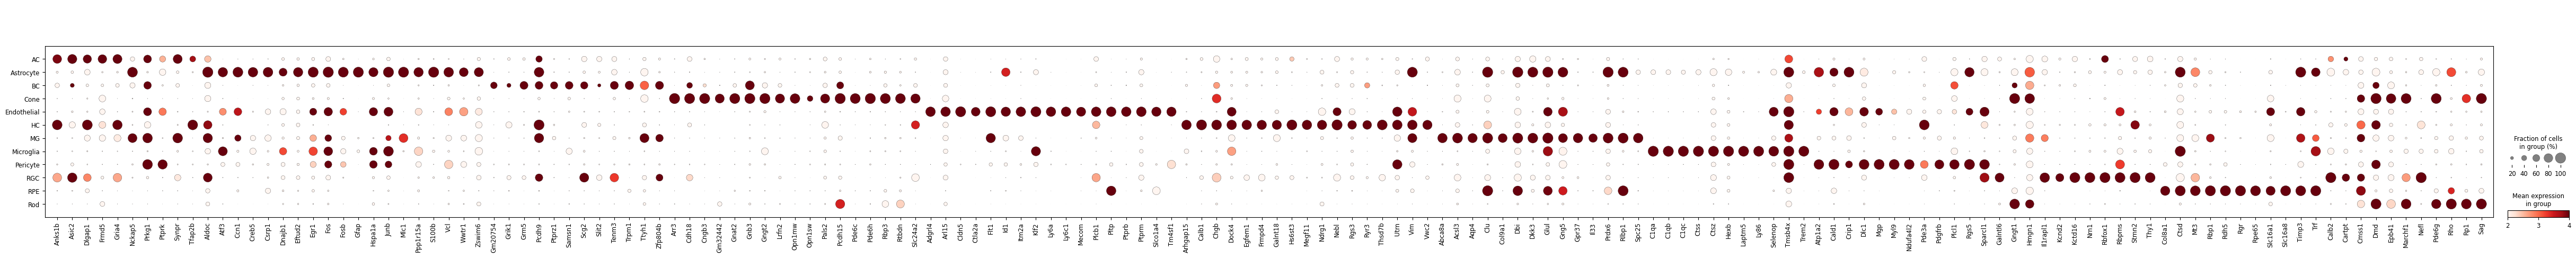

In [15]:
sc.pl.dotplot(adata,
              var_names = ordered_features.index,
              gene_symbols = "feature_name",
              groupby = 'majorclass',
              categories_order = adata.obs["majorclass"].cat.categories.sort_values(),
              vmax = count_lowcluster,
              vmin = count_lowcluster / 2,
              save = "/project/hipaa_ycheng11lab/atlas/CAMR2024/" +
                     "03_Filter_Model_Markers/figures/3_dotplot_" +
                     f"mouseRetina_{analysis_name}_xeniumFiltered." +
                     f"{count_lowcluster}-{count_highcluster}.pdf")

/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


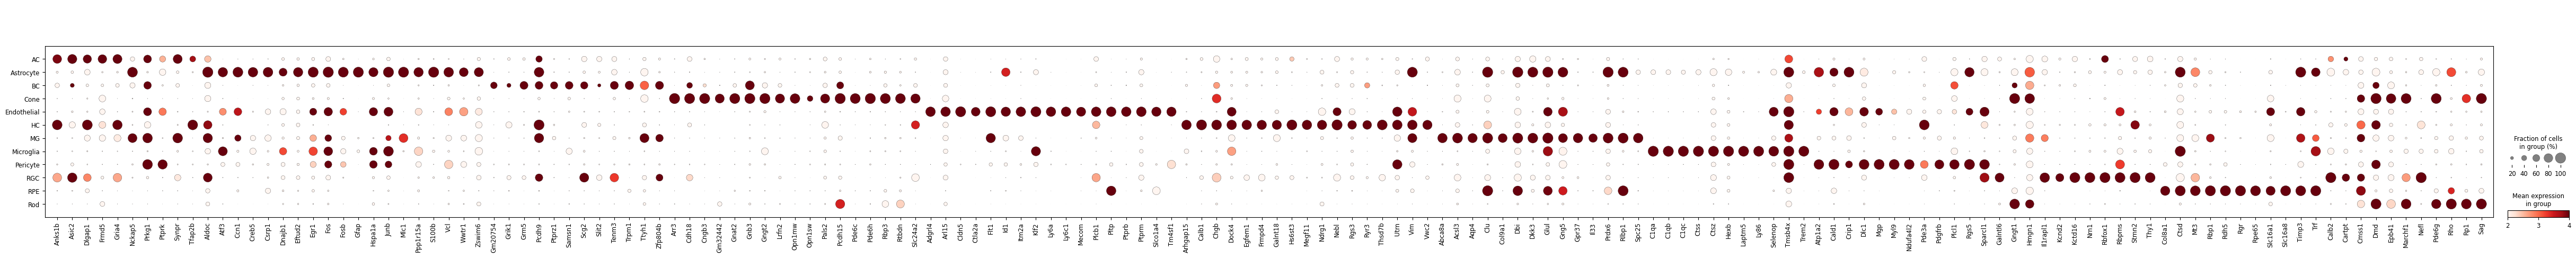

In [16]:
sc.pl.dotplot(adata,
              var_names = ordered_features.index,
              gene_symbols = "feature_name",
              groupby = 'majorclass',
              categories_order = adata.obs["majorclass"].cat.categories.sort_values(),
              use_raw = True,
              vmax = count_lowcluster,
              vmin = count_lowcluster / 2,
              save = "/project/hipaa_ycheng11lab/atlas/CAMR2024/" +
                     "03_Filter_Model_Markers/figures/3_dotplot_" +
                     f"mouseRetina_{analysis_name}_xeniumFiltered." +
                     f"{count_lowcluster}-{count_highcluster}_rawCounts.pdf")

## Subtype Markers

In [47]:
analysis_name = 'minorclass'
major_markers_remaining = {"total_genes": len(highly_variable), "variable_genes": len(gene_names)}
major_markers_remaining

{'total_genes': 32034, 'variable_genes': 2175}

In [48]:
top_features_log_reg_sub = pd.read_csv(f'02_Modeling/{analysis_name}/2_ovr_LogReg_{analysis_name}_AbsTop{number_of_features}Markers.txt', sep = '\t')
top_features_log_reg_pos_sub = top_features_log_reg_sub[top_features_log_reg_sub['Coefficient'] > 0]
top_features_log_reg_pos_sub.index = top_features_log_reg_pos_sub.Marker
major_markers_remaining["queried_genes"] = len(top_features_log_reg_pos_sub.Marker) # 2670
top_features_log_reg_pos_sub

,Name,Major_Name,Marker,Ensembl,Coefficient
Marker,,,,,
Ano3,10_Novel,RGC,Ano3,Ano3,0.667352
Pcdh9,10_Novel,RGC,Pcdh9,Pcdh9,0.572807
Pou6f2,10_Novel,RGC,Pou6f2,Pou6f2,0.451040
Tafa1,10_Novel,RGC,Tafa1,Tafa1,0.433950
Sdk1,10_Novel,RGC,Sdk1,Sdk1,0.399693
...,...,...,...,...,...
Epb41,Rod,Rod,Epb41,Epb41,0.272485
Pde6a,Rod,Rod,Pde6a,Pde6a,0.272482
Dmd,Rod,Rod,Dmd,Dmd,0.270124


In [49]:
top_features_log_reg_pos_sub = top_features_log_reg_pos_sub.loc[top_features_log_reg_pos_sub["Marker"].value_counts()==1]
major_markers_remaining['unique_queried_genes'] = len(top_features_log_reg_pos_sub['Marker']) # 299
print(major_markers_remaining, top_features_log_reg_pos_sub["Marker"].tolist())

{'total_genes': 32034, 'variable_genes': 2175, 'queried_genes': 2670, 'unique_queried_genes': 299} ['Gm17750', 'Runx1', 'Cntnap4', 'Adamts5', 'Hspb1', 'Gbe1', 'Gpx3', 'Lurap1l', 'Ier3', 'D130009I18Rik', 'Cntnap5c', 'Cd24a', 'Nme7', 'Plxna2', 'Rgs10', 'Jam2', 'Nrg3os', 'Gm20642', 'Thy1', 'Cfap206', 'Kitl', 'Asrgl1', 'Lhfpl3', 'Slc2a13', 'Ccdc88b', 'Gsdme', 'Grik2', 'Nrxn1', 'Nhlh2', 'Cacnb2', 'Gm49980', 'Gpr149', 'Kcnh5', 'Ly6h', 'Gadd45a', 'Slc17a8', 'Arhgap24', 'Gpm6b', 'B230312C02Rik', 'Cdk14', 'Cacna2d3', 'Marchf3', 'Sox2ot', 'Gabrd', 'Med12l', 'Lrrn3', 'Wwox', 'Npsr1', 'Crybb3', 'Ngfr', 'Dpf3', 'Mpped2', 'Atg4a', 'Abi3bp', 'Rnd3', 'Col12a1', 'Chn2', 'Glra1', 'Pak5', 'Pde8b', 'Gjd2', 'Stac2', 'Gm20063', 'Dnah11', 'Atrnl1', 'D030068K23Rik', 'Prom1', 'Slc6a9', 'Gas6', 'Thsd4', 'Ptprf', 'Esr1', 'Tfap2c', 'Efemp1', 'Phlda1', 'Slc6a5', 'Mn1', 'Greb1l', 'Gm16104', 'Abca13', 'Gm15398', 'Prr16', 'Hbegf', 'Sox5os4', 'Plxdc2', 'Arhgef26', 'Tnc', 'Ankfn1', 'Gm16618', 'Gng8', 'Trpc4', 'Eftud2',

In [50]:
# Filter based on innate features of the gene itself
in_regression = adata.var["feature_name"].astype(str).isin(top_features_log_reg_pos_sub["Marker"])
long_enough = adata.var["feature_length"].astype(int) >= 960 # It's a conservative filter

is_genomic_candidate = long_enough & in_regression
genomic_candidates = gene_names[is_genomic_candidate.tolist()].tolist()
major_markers_remaining["genomic_candidates"] = len(genomic_candidates)
print(major_markers_remaining["genomic_candidates"], genomic_candidates) # 278

278 ['4930555F03Rik', '5730522E02Rik', 'A930006I01Rik', 'A930009A15Rik', 'Abca13', 'Abca8a', 'Abhd2', 'Abi3bp', 'Acsl3', 'Adamts1', 'Adamts5', 'Adgrl4', 'Adrb1', 'Angpt1', 'Ankfn1', 'Aqp4', 'Areg', 'Arhgap15', 'Arhgap24', 'Arhgap42', 'Arhgef26', 'Arl15', 'Arr3', 'Asrgl1', 'Atg4a', 'Atp1a2', 'Atrnl1', 'B230312C02Rik', 'BC046251', 'Bcar3', 'Bcl2l11', 'Bcl6', 'Bhlhe23', 'Bsg', 'C1qa', 'C1qb', 'Cabp2', 'Cacna2d3', 'Cacnb2', 'Cald1', 'Ccdc163', 'Ccdc88b', 'Ccn1', 'Ccn2', 'Ccna2', 'Cd24a', 'Cd300c2', 'Cd52', 'Cd74', 'Cdh9', 'Cdk14', 'Cdkn1a', 'Cdr2', 'Cebpb', 'Cep112', 'Cfap206', 'Chn2', 'Cldn5', 'Cmss1', 'Cnga1', 'Cntnap4', 'Cntnap5c', 'Col12a1', 'Col8a1', 'Col9a1', 'Coro1a', 'Cpne7', 'Crip1', 'Cryab', 'Crybb3', 'Csrp1', 'Ctla2a', 'Cxcl10', 'D030068K23Rik', 'D130009I18Rik', 'Dbi', 'Ddit4l', 'Diaph3', 'Dlc1', 'Dnah11', 'Dock10', 'Dock4', 'Dpf3', 'Dusp4', 'Efemp1', 'Efr3b', 'Eftud2', 'Elovl4', 'Epb41', 'Epb41l2', 'Epha7', 'Esam', 'Esr1', 'Ezh2', 'Fat4', 'Fcgr3', 'Fcrls', 'Fezf2', 'Flt1', 'Fos

In [51]:
raw_mean_minorclass_expression = pd.read_csv(f'data/raw_meanExpression_{analysis_name}.txt', sep = '\t', index_col=0)
raw_mean_minorclass_expression

,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,Sanbr,0610010K14Rik,0610012D04Rik,Ncbp2as2,0610025J13Rik,...,mt-Co2,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd4l,mt-Nd5,mt-Nd6
author_cell_type,,,,,,,,,,,,,,,,,,,,,
10_Novel,0.012360,0.000000,0.639326,0.020225,0.092135,0.950562,0.487640,0.00000,1.900000,0.002247,...,53.048313,64.975280,52.285393,53.040450,16.444944,3.769663,24.226967,3.186517,4.889888,0.257303
11_Novel,0.008835,0.000803,0.661044,0.044980,0.072289,0.785542,0.710040,0.00000,1.861847,0.000803,...,60.710040,89.016870,48.861046,71.619280,20.704418,5.053012,28.594378,2.887550,6.356626,0.226506
12_ooDS_NT,0.008365,0.000000,0.628137,0.035741,0.070722,0.967300,0.505703,0.00076,1.721673,0.001521,...,39.049430,51.460075,39.652470,45.355892,14.647148,2.925475,19.208364,2.121673,3.701901,0.239544
13_Novel,0.005080,0.000726,0.656749,0.031205,0.089260,0.929608,0.643687,0.00000,1.672714,0.001451,...,39.003628,55.279392,39.720608,48.143690,13.962264,3.473875,20.338898,1.955733,4.317852,0.208999
14_ooDS_Cck,0.007946,0.000611,0.570293,0.029951,0.067237,0.842909,0.605746,0.00000,1.656479,0.001222,...,47.566628,67.343520,41.609413,43.292786,12.937653,2.811125,20.905869,2.105135,3.767726,0.222494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pericyte,0.002481,0.000000,0.104218,0.042184,0.084367,0.119107,0.129032,0.00000,0.173697,0.002481,...,15.389578,23.615385,16.771711,7.724566,6.263027,1.843673,9.250620,0.665012,1.374690,0.129032
RBC,0.003777,0.000176,0.216689,0.011506,0.033494,0.309149,0.243712,0.00000,0.412092,0.000000,...,51.690823,88.605270,56.627815,18.904552,13.865613,6.843156,26.222164,1.868833,5.845938,0.403513
RGC,0.004882,0.000000,0.426363,0.022783,0.063466,0.479251,0.372661,0.00000,1.154597,0.001627,...,25.212368,27.144833,22.438568,16.814484,8.567942,1.986168,9.100895,1.279902,2.152970,0.142392


In [52]:
# Filter based on the filtering criteria
# adata.obs.library_platform.unique() # mix of 4 chemistries...

# count_limit = 0.1 # Absolute detection limit
count_lowcluster = 4
count_highcluster = 100

detectable_genes = (raw_mean_minorclass_expression >= count_lowcluster).sum(axis=0) >= 1
optical_crowding_genes = (raw_mean_minorclass_expression > count_highcluster).sum(axis=0) > 0

is_expression_candidate = detectable_genes & (~optical_crowding_genes)
expression_candidates = gene_names[is_expression_candidate.loc[highly_variable.tolist()].tolist()].tolist()
major_markers_remaining["expression_candidates"] = len(expression_candidates)
print(major_markers_remaining["expression_candidates"], expression_candidates) # 669 genes

669 ['4930447C04Rik', '6330411D24Rik', 'A930001A20Rik', 'AI593442', 'Abca8a', 'Abcb1a', 'Abcc9', 'Abcg2', 'Acsl3', 'Actb', 'Adamtsl1', 'Adarb2', 'Adcy2', 'Adcy8', 'Adgrl4', 'Aif1', 'Aipl1', 'Alcam', 'Aldoc', 'Alk', 'Anks1b', 'Ano3', 'Aqp4', 'Arhgap15', 'Arhgap31', 'Arhgef26', 'Arl15', 'Arr3', 'Asic2', 'Astn2', 'Atf3', 'Atp10a', 'Atp1a2', 'Atp1b1', 'Atp2b1', 'Atrnl1', 'B2m', 'Basp1', 'Bc1', 'Bhlhe22', 'Blnk', 'Brinp3', 'Bsg', 'Btg2', 'C130073E24Rik', 'C1qa', 'C1qb', 'C1qc', 'C1ql1', 'C1ql2', 'C1ql3', 'Cabp5', 'Cacna2d1', 'Cacna2d3', 'Cacnb2', 'Cacng3', 'Calb1', 'Cald1', 'Camk4', 'Car14', 'Car2', 'Car3', 'Car8', 'Cbln2', 'Cbln4', 'Ccdc136', 'Ccdc141', 'Cck', 'Ccl12', 'Ccl2', 'Ccl3', 'Ccl4', 'Ccn1', 'Ccnl1', 'Cd24a', 'Cd52', 'Cd63', 'Cd74', 'Cd81', 'Cd83', 'Cd86', 'Cd9', 'Cdh11', 'Cdh12', 'Cdh18', 'Cdh20', 'Cdh22', 'Cdh6', 'Cdh8', 'Cdh9', 'Cdk14', 'Cdkn1a', 'Cdkn1c', 'Cebpd', 'Cep112', 'Cfh', 'Chgb', 'Chrm2', 'Chrm3', 'Chst9', 'Cldn10', 'Cldn5', 'Clic4', 'Clstn2', 'Clu', 'Cmss1', 'Cngb3',

In [53]:
final_candidates = np.intersect1d(expression_candidates, genomic_candidates)
major_markers_remaining["expression_genomic_queried_genes"] = len(final_candidates)
print(major_markers_remaining, final_candidates) # 135 genes

{'total_genes': 32034, 'variable_genes': 2175, 'queried_genes': 2670, 'unique_queried_genes': 299, 'genomic_candidates': 278, 'expression_candidates': 669, 'expression_genomic_queried_genes': 135} ['Abca8a' 'Acsl3' 'Adgrl4' 'Aqp4' 'Arhgap15' 'Arhgef26' 'Arl15' 'Arr3'
 'Atp1a2' 'Atrnl1' 'Bsg' 'C1qa' 'C1qb' 'Cacna2d3' 'Cacnb2' 'Cald1' 'Ccn1'
 'Cd24a' 'Cd52' 'Cd74' 'Cdh9' 'Cdk14' 'Cdkn1a' 'Cep112' 'Cldn5' 'Cmss1'
 'Col8a1' 'Col9a1' 'Coro1a' 'Crip1' 'Cryab' 'Csrp1' 'Ctla2a' 'Cxcl10'
 'D130009I18Rik' 'Dbi' 'Dlc1' 'Dock4' 'Dpf3' 'Eftud2' 'Epb41' 'Epb41l2'
 'Epha7' 'Flt1' 'Fosb' 'Frmd3' 'Ftl1' 'Gfap' 'Glra1' 'Gm32442' 'Gng5'
 'Gpm6b' 'Gpr37' 'Grik2' 'H2-K1' 'Hmgb2' 'Hspb1' 'Id1' 'Il33' 'Itm2a'
 'Kcnh5' 'Kitl' 'Klf2' 'Lhfpl3' 'Lrfn2' 'Ly6a' 'Ly6c1' 'Ly6h' 'Mecom'
 'Med12l' 'Mgp' 'Mlc1' 'Mt1' 'Mt3' 'Myl9' 'Ndrg1' 'Ndufa4l2' 'Neto1'
 'Neurod4' 'Nme7' 'Nrxn1' 'Opn1mw' 'Opn1sw' 'Pak5' 'Pde6c' 'Pde6g' 'Pde6h'
 'Pde8b' 'Pdgfrb' 'Phlda1' 'Plcl1' 'Pltp' 'Plxdc2' 'Ppp1r15a' 'Prdx6'
 'Prph2' 'Ptprb' 'Rb

In [54]:
ordered_features_sub = top_features_log_reg_pos_sub.loc[final_candidates.tolist()].sort_values(['Major_Name', 'Name'])
ordered_features_sub.to_csv(f'03_Filter_Model_Markers/3_ovr_LogReg_{analysis_name}_xeniumFiltered.txt', sep ='\t', index=False)
ordered_features_sub

,Name,Major_Name,Marker,Ensembl,Coefficient
Marker,,,,,
Cacnb2,AC_10,AC,Cacnb2,Cacnb2,0.260017
Grik2,AC_10,AC,Grik2,Grik2,0.606974
Nrxn1,AC_10,AC,Nrxn1,Nrxn1,0.311298
Kcnh5,AC_11,AC,Kcnh5,Kcnh5,0.160371
Ly6h,AC_12,AC,Ly6h,Ly6h,0.209824
...,...,...,...,...,...
Epb41,Rod,Rod,Epb41,Epb41,0.272485
Pde6g,Rod,Rod,Pde6g,Pde6g,0.260567
Rho,Rod,Rod,Rho,Rho,0.538664


In [ ]:
# Memory cleanup for plotting

del top_features_log_reg_sub, raw_mean_minorclass_expression, in_regression, long_enough, is_genomic_candidate, genomic_candidates, detectable_genes, optical_crowding_genes, is_expression_candidate, expression_candidates, final_candidates

adata.raw = None
adata.obs = adata.obs.loc[:, ["author_cell_type"]]
adata.var = adata.var.loc[:, ["gene_symbols", "feature_name"]]

import gc
import ctypes
gc.collect() # Free memory
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

In [ ]:
# Asking for lots of memory
sc.pl.dotplot(adata,
              ordered_features_sub.index,
              gene_symbols = "feature_name",
              groupby = 'author_cell_type',
              vmax = count_lowcluster,
              vmin = count_lowcluster / 2,
              figsize = (40, 2),
              save = f"mouseRetina_{analysis_name}_xeniumFiltered." +
                     f"{count_lowcluster}-{count_highcluster}.png")

### Subtype Marker Better Plots

Requirements:

* adata
* final_candidates_ordered
* final_candidates_ordered_sub
* count_lowcluster
* count_highcluster

In [27]:
# Run this if starting from scratch!

import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import joblib

sc.settings.n_jobs = -1

count_lowcluster = 4
count_highcluster = 100
analysis_name = 'minorclass'

adata = ad.read_h5ad('02_Modeling/2_camr_modeling_input.h5ad')
adata.var.index = adata.var["feature_name"] # subset on genes instead of booleans

final_candidates_ordered = pd.read_csv('03_Filter_Model_Markers/3_ovr_LogReg_majorclass_xeniumFiltered.txt', sep = '\t')
final_candidates_ordered_sub = pd.read_csv('03_Filter_Model_Markers/3_ovr_LogReg_minorclass_xeniumFiltered.txt', sep = '\t')

In [ ]:
majorclass = final_candidates_ordered["Name"].unique()
minorclass = final_candidates_ordered_sub["Name"].unique() # Not necessary
print(majorclass, minorclass)

In [28]:
subtype_to_type = pd.read_csv(f'02_Modeling/2_minorToMajorClass.txt', sep = '\t', index_col = 0)
subtype_to_type

/tmp/ipykernel_171299/271305905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subtype_to_type = adata.obs[["author_cell_type", "majorclass"]].groupby("author_cell_type").head(1)
/tmp/ipykernel_171299/271305905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subtype_to_type.groupby("majorclass").agg("count").to_csv('spreadsheets/number_of_subtypes.csv')


,author_cell_type,majorclass
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,RBC,BC
10x3_Ms_WT_P14_AAACCCAGTAGCTAAA-1,Rod,Rod
10x3_Ms_WT_P14_AAACCCATCGGCCCAA-1,MG,MG
10x3_Ms_WT_P14_AAACGAAAGACTCTAC-1,BC6,BC
10x3_Ms_WT_P14_AAACGAACAATGTTGC-1,BC5A,BC
...,...,...
rgc_T8_MPTK_2-CATCGTCGTACAAGCG-1,AC_54,AC
MouseACS2_CCGTGGAGTGCAACGA-1,AC_53,AC
MouseACS5_GGTGTTACAGGTCCAC-1,AC_62,AC
CTRLC57AllOther1_GCATGTACAGTCGTGC-1,Astrocyte,Astrocyte


In [ ]:
adata.raw = None
adata.obs = adata.obs.loc[:, ["majorclass", "author_cell_type"]]
adata.var = adata.var.loc[:, ["gene_symbols", "feature_name"]]

adata.var.index = adata.var["feature_name"] # subset on genes instead of booleans
adata.var_names_make_unique()

import gc
import ctypes
gc.collect() # Free memory
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

In [ ]:
for cell in majorclass:

    cell_markers = final_candidates_ordered[final_candidates_ordered == cell].index
    subtypes = subtype_to_type.loc[subtype_to_type.majorclass == cell, "author_cell_type"].tolist()
    subtype_markers = final_candidates_ordered_sub[final_candidates_ordered_sub.isin(subtypes)].index

    markers = cell_markers.tolist() + subtype_markers.tolist()

    # sc.pl.dotplot throws a fit if there are duplicates
    unique_markers = []
    for m in markers:
        if m not in unique_markers:
            unique_markers += [m]

    sc.pl.dotplot(adata[adata.obs.majorclass == cell, unique_markers],
                  unique_markers,
                  gene_symbols="feature_name",
                  groupby = 'author_cell_type',
                  vmax = count_lowcluster * 3,
                  vmin = count_lowcluster - 1,
                  show = False,
                  save = f"mouseRetina_{analysis_name}-{cell}_xeniumFiltered." +
                         f"{count_lowcluster}-{count_highcluster}.pdf")

# Scratch